In [2]:
#Imports
import cv2
import torch
import pathlib
import numpy as np
import torchvision
from torch import nn
from glob import glob
import matplotlib.pyplot as plt
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader
from utils import get_filenames_of_path
from torchvision.ops import box_convert
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

In [3]:
classes = np.loadtxt('classes.csv', skiprows=1, dtype=str, delimiter=',')
labels = classes[:, 2].astype(np.uint8)

In [4]:
files = glob('trainval/*/*_image.jpg')
files.sort()

In [5]:
bbox = np.fromfile(files[0].replace('_image.jpg', '_bbox.bin'), dtype=np.float32)

In [14]:
bbox


array([[ 1.6727113e+00,  2.0881876e-04,  1.2323308e-02,  1.5782281e+00,
        -5.4495955e-01,  1.1413322e+01,  1.9811929e+00,  5.5961199e+00,
         1.3354892e+00,  5.0000000e+00,  0.0000000e+00]], dtype=float32)

In [13]:
bbox = bbox.reshape([-1, 11])
x = bbox[:,3]
y = bbox[:,4]
l = bbox[:,5]
h = bbox[:,7]

x1 = x - l/2
y1 = y - h/2
x2 = x + l/2
y2 = y + h/2

x

array([1.5782281], dtype=float32)

IndexError: index 1 is out of bounds for axis 0 with size 1

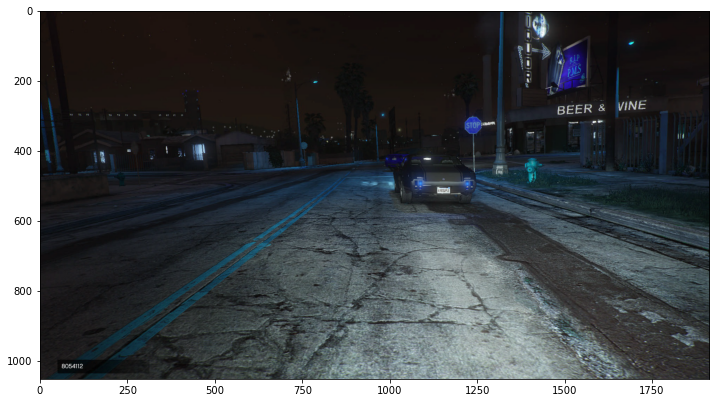

In [9]:
im =  cv2.imread(files[0])
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(im)
ax.add_patch(
             plt.Rectangle((bbox[0], bbox[1]),
                            bbox[2] - bbox[0],
                            bbox[3] - bbox[1],
                            fill=False,
                            edgecolor=COLORS[cntr % len(COLORS)],
                            linewidth=3.5))

In [10]:
files = glob('trainval/*/*_image.jpg')

In [13]:

files

['trainval/fold1/0000_image.jpg',
 'trainval/fold2/0001_image.jpg',
 'trainval/fold3/0002_image.jpg']

In [33]:
from utils import *

In [34]:
inputs = glob('trainval/*/*_image.jpg')
targets = glob('trainval/*/*_bbox.bin')

inputs.sort()
targets.sort()

In [36]:
dataset = PrepareDataset(inputs=inputs,
                        targets=targets)

NameError: name 'PrepareDataset' is not defined